<h1><center> ML ASSIGNMENT 2 (Income Prediction) </center></h1>

<h4>Dataset: Adult income classification
<br>
<br>
Group No: 49
<br>
<br>
Group Members:</h4>
<table align = "left">
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Shehza Fathima</td>
    <td>2021C104174</td>
  </tr>
  <tr>
    <td>Nithin Krishnan</td>
    <td>2021C104176</td>
  </tr>
  <tr>
    <td>Binsu Elizabeth Varghese</td>
    <td>2021C104187</td>
  </tr>
</table>

<h1>Objective</h1>

<h4>Import Libraries/Dataset</h4>

In [35]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import skew
import seaborn as sns
from prettytable import PrettyTable
import warnings
%matplotlib inline

# For feature selections and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from collections import Counter


# Importing the KNeighborsClassifier and svm algorithms for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

# For Analyzing the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

In [2]:
#Defining class colour
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [3]:
#Importing dataset
df = pd.read_csv('adult.csv')

<h4>1. Data Visualization and Exploration</h4>

In [4]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
#Size of the Dataset
print(color.BLUE + color.BOLD + "\nSize of Dataset:" + color.END)
print(df.shape)


Size of Dataset:
(48842, 15)


In [6]:
# Replace ? with python NaN
df.replace("?", np.NaN,inplace=True)

In [7]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column
mode1 = df['workclass'].value_counts().idxmax()
mode2 = df['occupation'].value_counts().idxmax()
mode3 = df['native-country'].value_counts().idxmax()
df['workclass'] = df['workclass'].fillna(mode1)
df['occupation'] = df['occupation'].fillna(mode2)
df['native-country'] = df['native-country'].fillna(mode3)

In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
# Attribute and its datatype
ptbl = PrettyTable()

for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type"]
    ptbl.add_row([attribute, df[attribute].dtype])
    
print(ptbl)

+-----------------+-----------+
|  Attribute Name | Data Type |
+-----------------+-----------+
|       age       |   int64   |
|    workclass    |   object  |
|      fnlwgt     |   int64   |
|    education    |   object  |
| educational-num |   int64   |
|  marital-status |   object  |
|    occupation   |   object  |
|   relationship  |   object  |
|       race      |   object  |
|      gender     |   object  |
|   capital-gain  |   int64   |
|   capital-loss  |   int64   |
|  hours-per-week |   int64   |
|  native-country |   object  |
|      income     |   object  |
+-----------------+-----------+


In [11]:
#Distribution Of Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of numerical attributes" + color.END
print(distTxt.center(100))
df.describe()

                       Data Distribution of numerical attributes                       


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#Distribution Of Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of categorical attributes" + color.END
print(distTxt.center(100))
df.describe(include=["O"])

                      Data Distribution of categorical attributes                      


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


Classification of Income:
<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

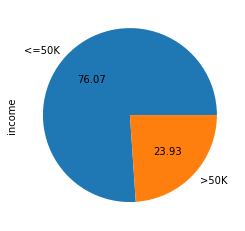

In [13]:
#Balanced or Imbalanced Dataset
print(color.BLUE + color.BOLD + "Classification of Income:" + color.END)
count = df['income'].value_counts()
print(count)
count.plot.pie(autopct='%.2f')

In [14]:
#Comment on class imbalance with appropriate visualization method

In [15]:
# Mapping binary values to the target variable
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [16]:
columnsList = list(df)
categoricalList = list(df.select_dtypes(include=['object']).columns)
numericalList = list(set(columnsList) - set(categoricalList))

#Character or Numerical Data
print(color.BLUE + color.BOLD + "Categorical Data:" + color.END)
print(categoricalList)
print(color.BLUE + color.BOLD + "\nNumerical Data:" + color.END)
print(numericalList)

Categorical Data:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Numerical Data:
['capital-gain', 'income', 'age', 'educational-num', 'capital-loss', 'fnlwgt', 'hours-per-week']


In [17]:
print("Qualitiative Features: ", len(categoricalList))
print(categoricalList)
print('----------------------------------------')

for column in categoricalList:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(df[column].unique()))

        # Diplays count of each value of the column
        print(df[column].value_counts())

        print("_________________________________________________________________")

Qualitiative Features:  8
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
----------------------------------------
workclass : ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
_________________________________________________________________
education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school

In [18]:
print("Quantitative Features: ", len(numericalList))
print(numericalList)
print("-----------------------------------")

for column in numericalList:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(df[column].unique()))

        # Diplays count of each value of the column
        print(df[column].value_counts())

        print("_________________________________________________________________")

Quantitative Features:  7
['capital-gain', 'income', 'age', 'educational-num', 'capital-loss', 'fnlwgt', 'hours-per-week']
-----------------------------------
capital-gain : [    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5721  1173  4687  6612
  6767  2961   991  2036  2936  2050  1111  2228 22040  3432  6360  2009
  1639 18481  2387]
0        44807
15024      513
7688       410
7298       364
99999      244
 

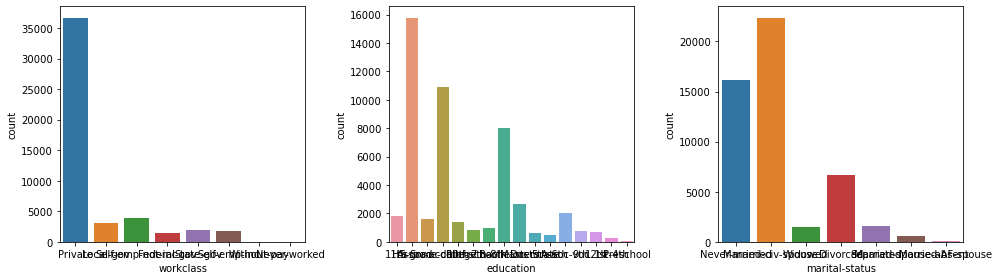

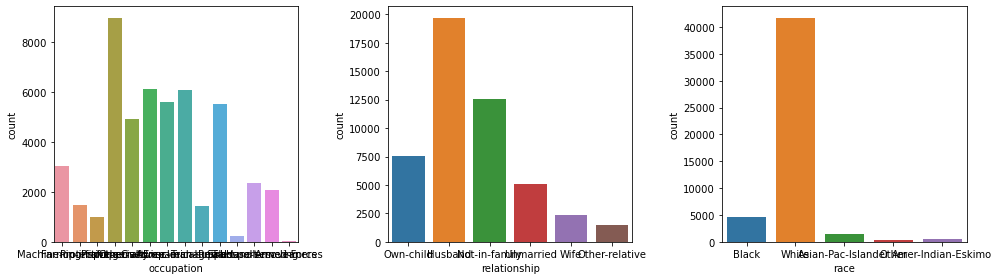

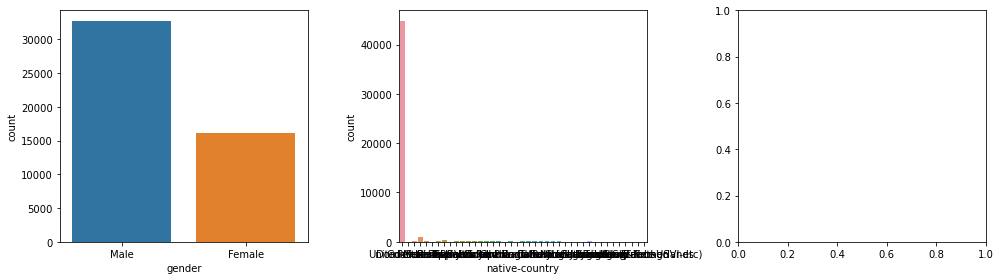

In [18]:
#Count Plots (for categorical attributes)

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

index = 0
graphsInARow = 3

for attr in categoricalList:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
        
    sns.countplot(x=attr, data=df, ax = ax[index % graphsInARow])
    index = index + 1
    
    if (index % graphsInARow == 0):
        plt.show()

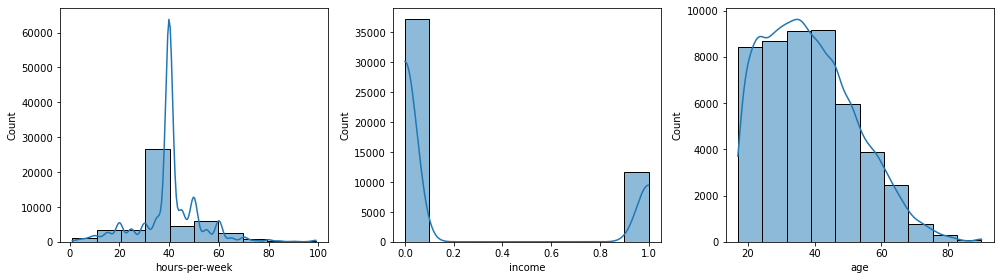

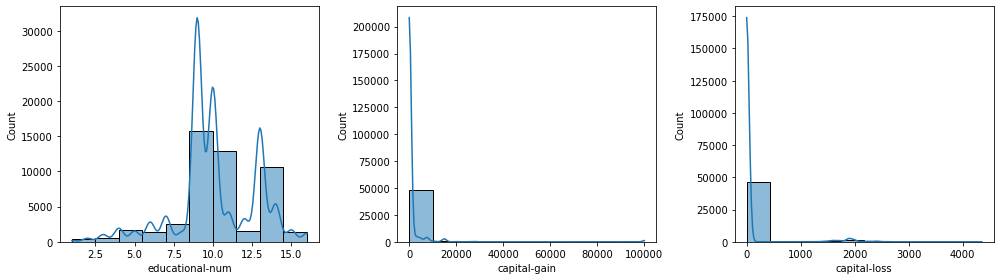

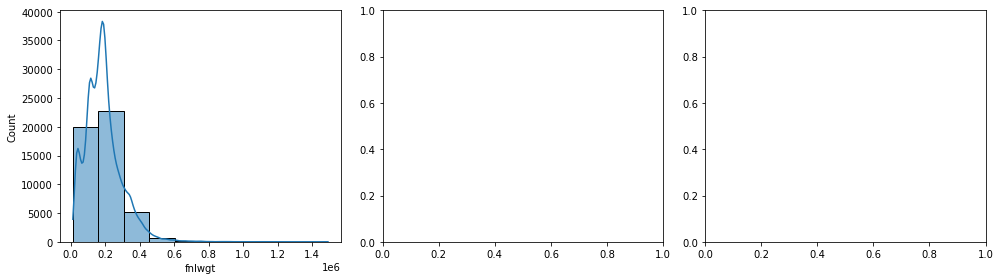

In [31]:
#Histogram Distribution (for Continuous Attributes)

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

index = 0
graphsInARow = 3

for attr in numericalList:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=df[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()

                                         Correlation Using HeatMap                                         


<AxesSubplot:>

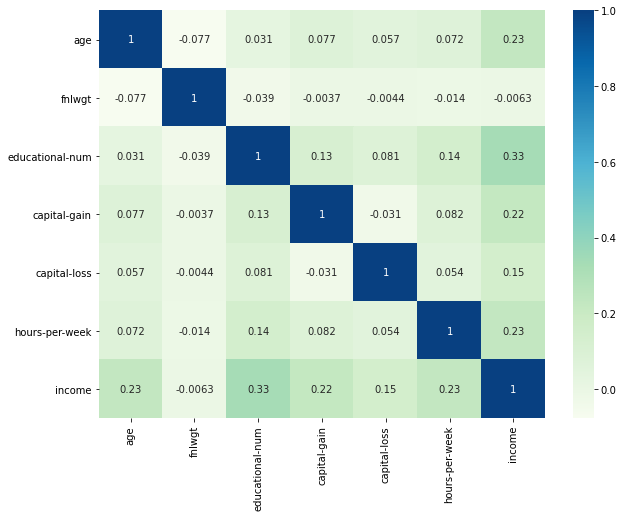

In [19]:
#Correlation of the features in the dataset
corr = df.corr()

corrTxt = color.BLUE + color.BOLD + "Correlation Using HeatMap" + color.END
print(corrTxt.center(120))

#Visualizing correlation using Heatmap
plt.figure(figsize=(10,7.5))
sns.heatmap(corr, annot=True, cmap='GnBu')

In [20]:
#Will this correlational analysis have an effect on feature selection that you will perform in the next step?Justify your answer

In [21]:
#*******Since fnlwgt has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

<h4>2. Data Pre-processing and cleaning</h4>
1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. <br><br>2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

<h4>3. Model Building</h4>
1. Split the dataset into training and test sets. Answers without justification will not be awarded marks. [1M]
<br>2. Build Models using SVM and KNN. Identify the best parameter and justify your answer

In [22]:
#Splitting the data set into features and outcome

X = df.drop(['income'], axis=1)
Y = df['income']

In [23]:
#Splitting the data into test data and training data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [24]:
for feature in categoricalList:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [25]:
#Using StandardScalar to normalise the dataset
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [26]:
X_train.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.849978,-1.887643,1.212393,-0.027733,-0.406325,-1.554732,0.969833,0.390646,-1.425582,-0.144199,-0.216492,-0.034027,0.258084
1,0.241031,-0.094859,-2.650223,-1.587187,-0.406325,-1.049322,0.969833,-0.797592,0.701468,-0.144199,-0.216492,0.207331,0.258084
2,-0.486308,1.697924,-0.590161,0.362131,-0.406325,-0.543912,-0.899325,0.390646,0.701468,0.850561,-0.216492,2.379553,0.258084
3,-0.195373,-0.094859,1.212393,-0.027733,0.922720,-0.796617,-0.276272,0.390646,-1.425582,-0.144199,-0.216492,1.575026,0.258084
4,-0.704510,-0.094859,0.182362,-0.417596,1.587242,1.730434,1.592886,0.390646,-1.425582,-0.144199,-0.216492,-0.838553,0.258084


In [27]:
#Dimensionality Reduction using PCA
pca = PCA(.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train) #PCA transformation on Train Set
X_test_pca = pca.transform(X_test) #PCA transformation on Test Set

#How much information (variance) attributed to each of the principal components
explained_variance = pca.explained_variance_ratio_
print(color.BLUE + color.BOLD + 'Variance attributed to each of the principal components:' + color.END)
print(explained_variance)

Variance attributed to each of the principal components:
[0.15852661 0.10860251 0.08544364 0.08404148 0.07982342 0.07745533
 0.07606649 0.07090708 0.06573248 0.06485667 0.05258604 0.04619218]


In [28]:
#Handling the Dataset Imbalance Using Hybridization: SMOTE + Tomek Links
counter = Counter(Y_train) #Before Sampling, count of Y_train
print(color.BLUE + color.BOLD + 'Before Sampling:' + color.END)
print(counter)

#Oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)  #To get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train_pca, Y_train) #Fit the resampled model

counter = Counter(y_train_smtom) #After Sampling, Count of y_train_smtom
print(color.BLUE + color.BOLD + 'After Sampling:' + color.END)
print(counter)

Before Sampling:
Counter({0: 26017, 1: 8172})
After Sampling:
Counter({0: 25415, 1: 25415})


In [ ]:
#Applying the K Nearest Neighbour (KNN) algorithm
def KNN(X_train_smtom, y_train_smtom):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train_smtom, y_train_smtom) 
    Y_pred = knn.predict(X_test_pca)
    acc_knn = round(knn.score(X_train_smtom, y_train_smtom) * 100, 2)

In [ ]:
#Applying the Support Vector Machine (SVM) algorithm
warnings.simplefilter(action="ignore", category=FutureWarning)
def SVC(X_train_smtom, y_train_smtom):
    linear_svc = LinearSVC()
    linear_svc.fit(X_train_smtom, y_train_smtom)
    Y_pred = linear_svc.predict(X_test_pca)
    acc_linear_svc = round(linear_svc.score(X_train_smtom, y_train_smtom) * 100, 2)

<h4>4. Performance Evaluation</h4>
1. Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. 
<br>2. Comment on underfitting/overfitting/just right model. Justify your comment.

In [46]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN'],
    'Score': [acc_linear_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

,Model
Score,
90.83,KNN
77.50,Support Vector Machines


In [ ]:
#create a new knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 15)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, n_jobs=-1)
#fit model to data
knn_gscv.fit(X_train_smtom, y_train_smtom)

#check top performing n_neighbors value
knn_gscv.best_params_

In [108]:
#Define the parameter values that should be searched
k_range=list(range(1,31))
options=['uniform', 'distance']

#specify "parameter distribution" rather than "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=options)

#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

knn2=KNeighborsClassifier()
rand = RandomizedSearchCV(knn2, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train_smtom, y_train_smtom)
#rand.grid_scores_

print(rand.best_score_)
print(rand.best_params_)

0.8793429077316546
{'weights': 'distance', 'n_neighbors': 10}


In [ ]:
# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train_smtom, y_train_smtom) 
print(rand_search.cv_results_)

print(rand_search.best_score_)
print(rand_search.best_params_)

In [74]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_smtom, y_train_smtom)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.789 total time= 5.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time= 6.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time= 6.6min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.819 total time= 6.6min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time= 6.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time= 3.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time= 3.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time= 3.4min


KeyboardInterrupt: 

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

In [63]:
#Finding significance of each feature in t5he best fit model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.222
capital-gain,0.127
relationship,0.121
hours-per-week,0.113
educational-num,0.098
occupation,0.083
marital-status,0.066
workclass,0.048
capital-loss,0.040


<AxesSubplot:xlabel='feature'>

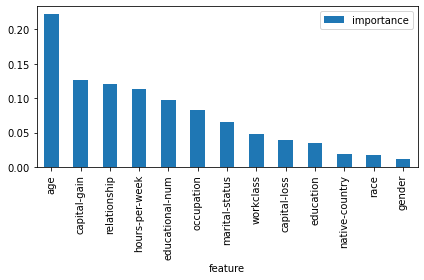

In [64]:
#Plotting the significance of each feautre

importances.plot.bar()

In [65]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("gender", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native-country", axis=1)

In [66]:
#The accuracy remains the same even after dropping the columns ?ff

In [68]:
#Applying the K Nearest Neighbour (KNN) algorithm

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_smtom, y_train_smtom) 
Y_pred = knn.predict(X_test_pca)
acc_knn = round(knn.score(X_train_smtom, y_train_smtom) * 100, 2)

In [69]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN'],
    'Score': [acc_linear_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

,Model
Score,
93.28,KNN
77.50,Support Vector Machines


In [36]:
print(classification_report(Y_test, Y_pred))#Checking performance our model with ROC Score.
roc_auc_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     11138
           1       0.50      0.77      0.61      3515

    accuracy                           0.76     14653
   macro avg       0.71      0.76      0.72     14653
weighted avg       0.81      0.76      0.77     14653



0.7632585969833515

In [ ]:
cv_dataFrames = []
    
# Prepare Machine Learning models – Logistic regression and Decision tree
models = []

#Parametric Supervised learning model based on probability
models.append(('Support Vector Machine(SVM)', SVC()))
#Non-Parametric Supervised learning model by learning simple decision rules inferred from the data features
models.append(('K Neighbours(KNN)', KNeighborsClassifier())) 

results = []
mNames = [] #List for collecting model names

#List of scoring metrics for comparison of models
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc'] 

targ_names = ['0', '1'] #List of target values

for mName, model in models: #Looping through each of the models

#Split the dataset into '5' folds and Each fold is used once as a validation while the '5 - 1' remaining folds form the training set
#Shuffle is set to 'True' to shuffle the data before splitting into batches
#Random_state affects the ordering of the indices, which controls the randomness of each fold
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210) 

#Evaluate metrics by cross-validation
cv_res = model_selection.cross_validate(model, X_train_smtom, y_train_smtom, cv=kfold, scoring=scoring)

#Fit the model and predict the label of test set
ml = model.fit(X_train_smtom, y_train_smtom) 
y_pred = ml.predict(X_test)

print(color.BLUE + color.BOLD + mName + color.END)

#Number of correct and incorrect predictions compared wih Actual class and Predicted class
cm = confusion_matrix(Y_test, y_pred)

TN = cm[0][0] #True Negative(Model predicted No and the Actual is also No, classifier is getting things right)
TP = cm[1][1] #True Positive(Model predicted Yes and the Actual is also Yes, classifier is getting things right)
FN = cm[1][0] #False Negative(Model predicted No and the Actual is Yes, classifier is getting things wrong i.e, mislabelling)
FP = cm[0][1] #False Positive(Model predicted Yes and the Actual is No, classifier is getting things wrong i.e, mislabelling)

print(color.BOLD + "\nConfusion Matrix:" + color.END)

column_names = ['Predicted 0', '1']
row_names    = ['Actual 0', '1']

cm_df = pd.DataFrame(cm, columns=column_names, index=row_names)

print(cm_df)

#Accuracy determines how often is classifier correct, (TP+TN)/Total
print(color.BOLD + "\nAccuracy:" + color.END)
print(round(accuracy_score(Y_test, y_pred) * 100, 2),"%")

#Return the list of scores calculated for each cv='10' folds, estimator object implementing ‘fit’ and n_jobs='-1' means using all processors
cross_val_lr = cross_val_score(estimator = model, X = X_train_smtom, y = y_train_smtom, cv = 10, n_jobs = -1)
print(color.BOLD + "\nCross Validation Accuracy:" + color.END)
print(round(cross_val_lr.mean() * 100 , 2),"%")

#Report showing the main classification metrics with the target names 'Yes' and 'No'
print(color.BOLD + "\nClassification Report:" + color.END)
print(classification_report(Y_test, y_pred, target_names=targ_names))

#Get False Positive Rates and True Postive rates for the Classifiers
#By roc_curve module by passing the test dataset and the predicted data through it
print(color.BOLD + "\nReceiver Operating Characteristic(ROC):" + color.END)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred)

#Ploting ROC Curves with False Positive Rate on X-axis and True Positive Rate on Y-axis
title = 'Receiver Operating Characteristic(ROC) - ' + mName
plt.subplots(1, figsize=(10,10))
plt.title(title)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

results.append(cv_res) #Appending the cross validation metrics
mNames.append(mName) #Appending each of the model names

dataFrame = pd.DataFrame(cv_res) #Create data frame of cross validation results
dataFrame['model'] = mName #Add the model name to dataframe
cv_dataFrames.append(dataFrame) #Append each of the data frames

result = pd.concat(cv_dataFrames, ignore_index=True) #Concatenate the the dataframes object ingnoring index

In [ ]:
 mlValues = []

#Iterating through result values and append the values of each models to mlValues[]
for model in list(set(result.model.values)): 
    m_dataFrame = result.loc[result.model == model]
    mlValue = m_dataFrame.sample(n=30, replace=True)
    mlValues.append(mlValue)

m_dataFrame = pd.concat(mlValues, ignore_index=True) #Concatenate the the dataframes object ingnoring index

#Massage a DataFrame into a format where identifier variable is 'model', variable column 'metrics' and value column 'values'
perf_results = pd.melt(m_dataFrame,id_vars=['model'],var_name='metrics', value_name='values')

tym_metrics = ['fit_time','score_time'] # Fit time Metrics

#Performance Metrics
perf_results_nofit = perf_results.loc[~perf_results['metrics'].isin(tym_metrics)] # Get dataframe without fit data
perf_results_nofit = perf_results_nofit.sort_values(by='values') #Sort the performance result on its values

#Visualization of Comparison of LR and CART Model using BoxPlot
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.0)
g = sns.boxplot(x="model", y="values", hue="metrics", data=perf_results_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of LR and CART Model by Classification Metric')

In [ ]:
#Comparison of Performance metrics
metricValues = list(set(perf_results_nofit.metrics.values))
m_dataFrame.groupby(['model'])[metricValues].agg([np.std, np.mean]) #aggregate metric values with standard deviation and mean